In [1]:
import pandas as pd 
from app_dataset import DataBuilder
from app_model import TransferLearning
from app_utils import *
from torch import nn 
from sklearn.metrics import accuracy_score
import torch

In [8]:
all_predictions = []
all_labels = []
df = pd.read_csv("./data/poi_train.csv", sep=';', decimal='.')
train_loader, val_loader, num_features_tab=DataBuilder(dataframe=df).build()
model=TransferLearning(activation_function=nn.PReLU(),num_features_tab=num_features_tab)
state_dict = torch.load("./modelos/best_model_0.5183_B.pth", weights_only=True)
model.load_state_dict(state_dict)

model.eval()
with torch.no_grad():
    for (images, tabular_data), labels in val_loader:
        predictions = model(images, tabular_data)
        predicted_classes = torch.argmax(predictions, dim=1)
        all_predictions.extend(predicted_classes.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
accuracy = accuracy_score(all_labels, all_predictions)
print("Accuracy en Validación:", accuracy)        

Accuracy en Validación: 0.7808764940239044


In [37]:
all_predictions = []
all_labels = []
df = pd.read_csv("./data/poi_test.csv", sep=';', decimal='.')
test_loader,  num_features_tab=DataBuilder(dataframe=df).build_test()
model=TransferLearning(activation_function=nn.PReLU(),num_features_tab=num_features_tab)
state_dict = torch.load("./modelos/best_model_0.5183_B.pth", weights_only=True)
model.load_state_dict(state_dict)

model.eval()
with torch.no_grad():
    for (images, tabular_data), labels in test_loader:
        predictions = model(images, tabular_data)
        predicted_classes = torch.argmax(predictions, dim=1)
        all_predictions.extend(predicted_classes.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
accuracy = accuracy_score(all_labels, all_predictions)
print("Accuracy en TEST:", accuracy) 

Accuracy en TEST: 0.7515923566878981


In [33]:
all_predictions = []
all_labels = []
df = pd.read_csv("./data/poi_test.csv", sep=';', decimal='.')
test_loader,  num_features_tab=DataBuilder(dataframe=df).build_test()
model=TransferLearning(activation_function=nn.PReLU(),num_features_tab=num_features_tab)
state_dict = torch.load("./modelos/best_model_0.5343_B.pth", weights_only=True)
model.load_state_dict(state_dict)

model.eval()
with torch.no_grad():
    for (images, tabular_data), labels in test_loader:
        predictions = model(images, tabular_data)
        predicted_classes = torch.argmax(predictions, dim=1)
        all_predictions.extend(predicted_classes.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
accuracy = accuracy_score(all_labels, all_predictions)
print("Accuracy en TEST:", accuracy) 

Accuracy en TEST: 0.7738853503184714


In [ ]:
df = pd.read_csv("./data/poi_test.csv", sep=';', decimal='.')
_,  num_features_tab =DataBuilder(dataframe=df).build_test()

Index(['tier', 'xps', 'geo_cluster'], dtype='object')
torch.Size([314, 3])
torch.Size([314, 11])


In [ ]:
model=TransferLearning(activation_function=nn.PReLU(),num_features_tab=num_features_tab)

state_dict = torch.load("./modelos/best_model_0.5343_B.pth", weights_only=True)

model.load_state_dict(state_dict)

model.eval()

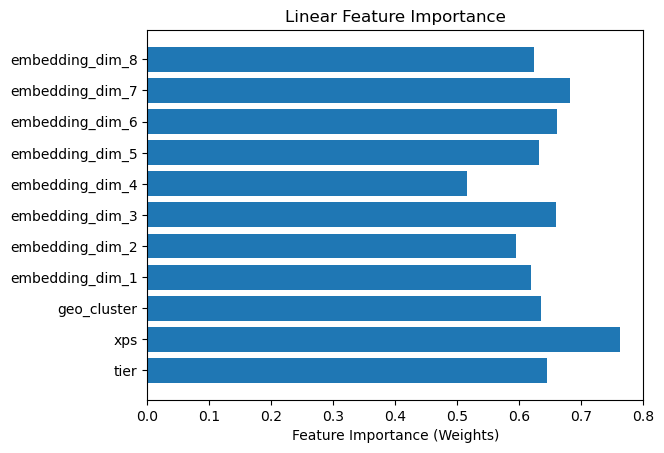

In [4]:
embedding_dims = [f"embedding_dim_{i+1}" for i in range(8)]
column_names = ['tier','xps','geo_cluster'] + embedding_dims
linear_feature_importance(model,column_names)